In [43]:
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from mastercard import dist_visualisation, dist_categorical_visualisation

In [2]:
PROCESSED_DATA = Path("../data/processed/")

In [3]:
PROCESSED_DATA

WindowsPath('../data/processed')

In [4]:
df = pd.read_parquet(PROCESSED_DATA / "transactions.parquet")

In [5]:
df.head()

,transaction_id,timestamp,user_id,merchant_id,amount,channel,currency,device,location,payment_method,is_international,session_length_seconds,is_first_time_merchant,is_fraud
0,TX000000,2022-06-17 23:28:00,U14804,M0314,130.03,in-store,EUR,Android,"{'lat': 40.057938, 'long': 14.959737}",debit_card,1,145,0,0
1,TX000001,2022-01-04 15:39:00,U16634,M0675,132.00,online,EUR,Android,"{'lat': 42.05935, 'long': 1.596625}",debit_card,1,32,1,0
2,TX000002,2022-09-09 21:58:00,U18005,M0479,8.65,online,EUR,Android,"{'lat': 50.923432, 'long': 21.795262}",credit_card,1,604,1,0
3,TX000003,2023-11-20 06:40:00,U13690,M0538,19.82,mobile,EUR,iOS,"{'lat': 56.833396, 'long': -9.881566}",credit_card,0,1031,1,0
4,TX000004,2022-04-28 08:08:00,U04642,M0128,101.92,in-store,EUR,Android,"{'lat': 54.042996, 'long': 2.168516}",credit_card,1,330,0,0


In [6]:
print("Initial shape:", df.shape)

Initial shape: (500000, 14)


In [7]:
df.columns

Index(['transaction_id', 'timestamp', 'user_id', 'merchant_id', 'amount',
       'channel', 'currency', 'device', 'location', 'payment_method',
       'is_international', 'session_length_seconds', 'is_first_time_merchant',
       'is_fraud'],
      dtype='object')

In [8]:
df.dtypes

transaction_id                    object
timestamp                 datetime64[ns]
user_id                           object
merchant_id                       object
amount                           float64
channel                           object
currency                          object
device                            object
location                          object
payment_method                    object
is_international                   int64
session_length_seconds             int64
is_first_time_merchant             int64
is_fraud                           int64
dtype: object

In [9]:
df.sample(n=10)

,transaction_id,timestamp,user_id,merchant_id,amount,channel,currency,device,location,payment_method,is_international,session_length_seconds,is_first_time_merchant,is_fraud
117957,TX117957,2022-12-01 00:33:00,U19008,M0428,36.97,online,EUR,iOS,"{'lat': 61.215784, 'long': 21.846887}",mobile_payment,1,379,1,0
439687,TX439687,2023-03-10 22:08:00,U11261,M0553,8.78,online,EUR,Web,"{'lat': 49.742798, 'long': 14.516748}",bank_transfer,1,347,0,0
109821,TX109821,2022-10-08 18:09:00,U14256,M0529,48.14,in-store,EUR,Web,"{'lat': 58.448231, 'long': 28.744}",credit_card,1,606,0,0
121667,TX121667,2023-03-24 12:04:00,U18156,M0873,65.61,in-store,EUR,iOS,"{'lat': 62.12061, 'long': 26.187016}",mobile_payment,1,183,0,0
396003,TX396003,2022-01-31 16:56:00,U15236,M0171,59.46,in-store,EUR,Android,"{'lat': 68.431516, 'long': 36.56385}",credit_card,1,64,0,0
401548,TX401548,2023-10-24 22:53:00,U11872,M0471,76.92,in-store,EUR,Web,"{'lat': 66.87343, 'long': 8.738105000000001}",debit_card,1,1101,1,0
161440,TX161440,2023-04-13 17:18:00,U05806,M0688,11.15,online,EUR,Android,"{'lat': 60.752394, 'long': -9.255584}",debit_card,1,748,0,0
314377,TX314377,2023-01-21 08:44:00,U07629,M0001,3.80,mobile,EUR,Android,"{'lat': 48.011102, 'long': 29.222744}",debit_card,1,470,1,0
178909,TX178909,2022-06-13 02:58:00,U10639,M0737,41.99,in-store,EUR,Android,"{'lat': 45.489299, 'long': -4.3171990000000005}",debit_card,1,169,1,0
178738,TX178738,2022-10-14 23:04:00,U04395,M0751,12.15,online,EUR,iOS,"{'lat': 44.463748, 'long': 23.167459}",credit_card,1,547,1,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   transaction_id          500000 non-null  object        
 1   timestamp               500000 non-null  datetime64[ns]
 2   user_id                 500000 non-null  object        
 3   merchant_id             500000 non-null  object        
 4   amount                  500000 non-null  float64       
 5   channel                 500000 non-null  object        
 6   currency                500000 non-null  object        
 7   device                  500000 non-null  object        
 8   location                500000 non-null  object        
 9   payment_method          500000 non-null  object        
 10  is_international        500000 non-null  int64         
 11  session_length_seconds  500000 non-null  int64         
 12  is_first_time_merchant  500000

# Descriptive statistics
- univariate analysis
- bivariate analysis
- multivariate analysis

In [11]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
timestamp,500000,2022-12-31 16:45:04.497720576,2022-01-01 00:06:00,2022-07-01 11:03:45,2022-12-31 20:08:30,2023-07-02 08:45:15,2023-12-31 23:57:00,NaN
amount,500000.0,49.915662,0.0,14.37,34.56,69.1725,714.86,49.990657
is_international,500000.0,0.928662,0.0,1.0,1.0,1.0,1.0,0.257389
session_length_seconds,500000.0,614.987182,30.0,323.0,614.0,907.0,1200.0,338.091496
is_first_time_merchant,500000.0,0.501248,0.0,0.0,1.0,1.0,1.0,0.499999
is_fraud,500000.0,0.084822,0.0,0.0,0.0,0.0,1.0,0.278617


# Target variable

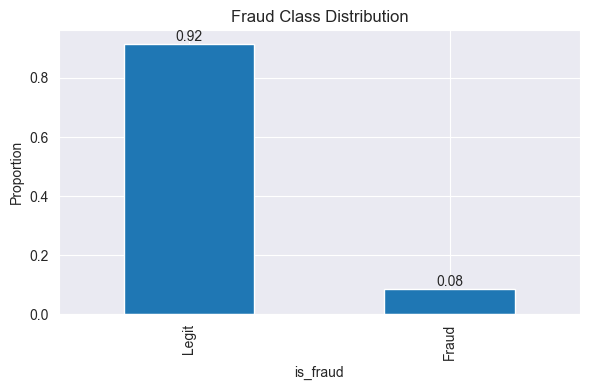

In [12]:
frauds_counts = df['is_fraud'].value_counts(normalize=True)

fix, ax = plt.subplots(figsize=(6, 4))

frauds_counts.plot(kind='bar', ax=ax)

ax.set_title('Fraud Class Distribution')
ax.set_xticks([0, 1])
ax.set_xticklabels(["Legit", "Fraud"])
ax.set_ylabel('Proportion')

for i, v in enumerate(frauds_counts):
	ax.text(i, v + 0.01, f'{v:.2f}', ha='center')

plt.tight_layout()
plt.show()

##### Summary: Class distribution is highly imbalanced

- accuracy - will be misleading
- use metrics like F1-score, Recall, ROC-AUC
- consider resampling (undersample, oversample)
- use algorithms with built-in support for imbalanced data (q.g. XGBoost)

# Numerical features

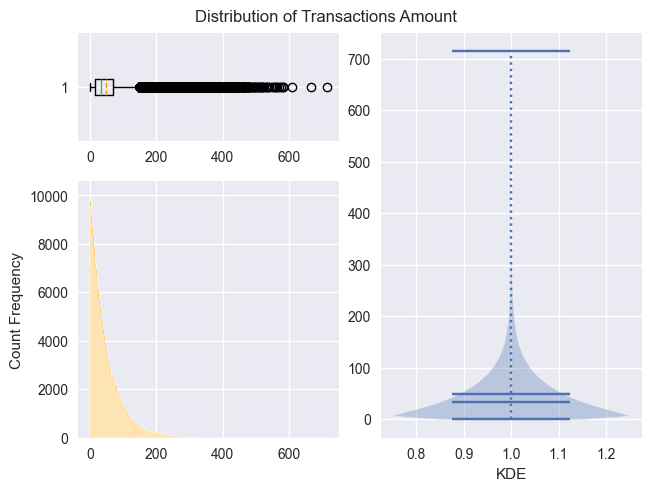

In [13]:
dist_visualisation(df['amount'], title='Distribution of Transactions Amount')

In [14]:
df["amount"].describe()

count    500000.000000
mean         49.915662
std          49.990657
min           0.000000
25%          14.370000
50%          34.560000
75%          69.172500
max         714.860000
Name: amount, dtype: float64

#### Summary: amount is strongly right-skewed wit a long tail, this suggests the presence of outliers

- recommendation: appy log transformation (e.g. log1p) for algorithms sensitive to distribution shape

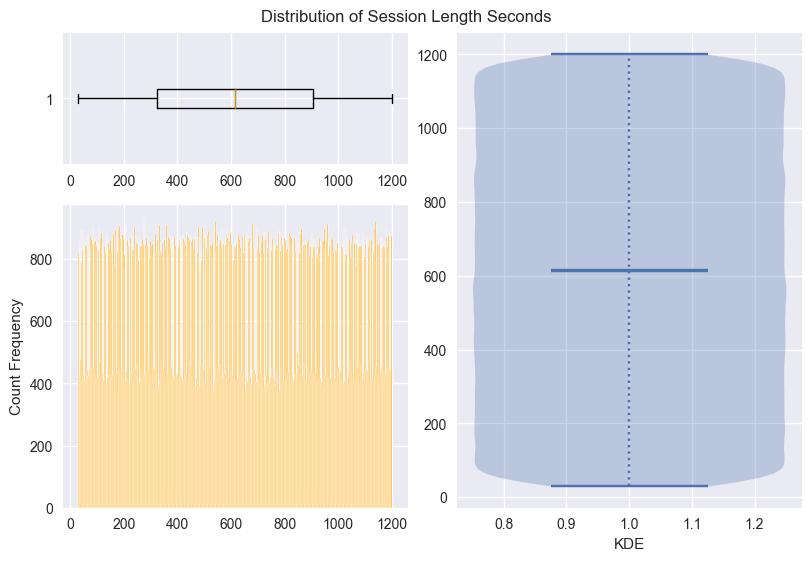

In [15]:
dist_visualisation(df['session_length_seconds'], title='Distribution of Session Length Seconds')

#### Summary: session_length_seconds is uniform distributed, which is unusual in real behavioral data

- indicates synthetic generation or flattening
- low predictive power unless frauds are concentrated in specific ranges(to be checked later)

### Categorical features

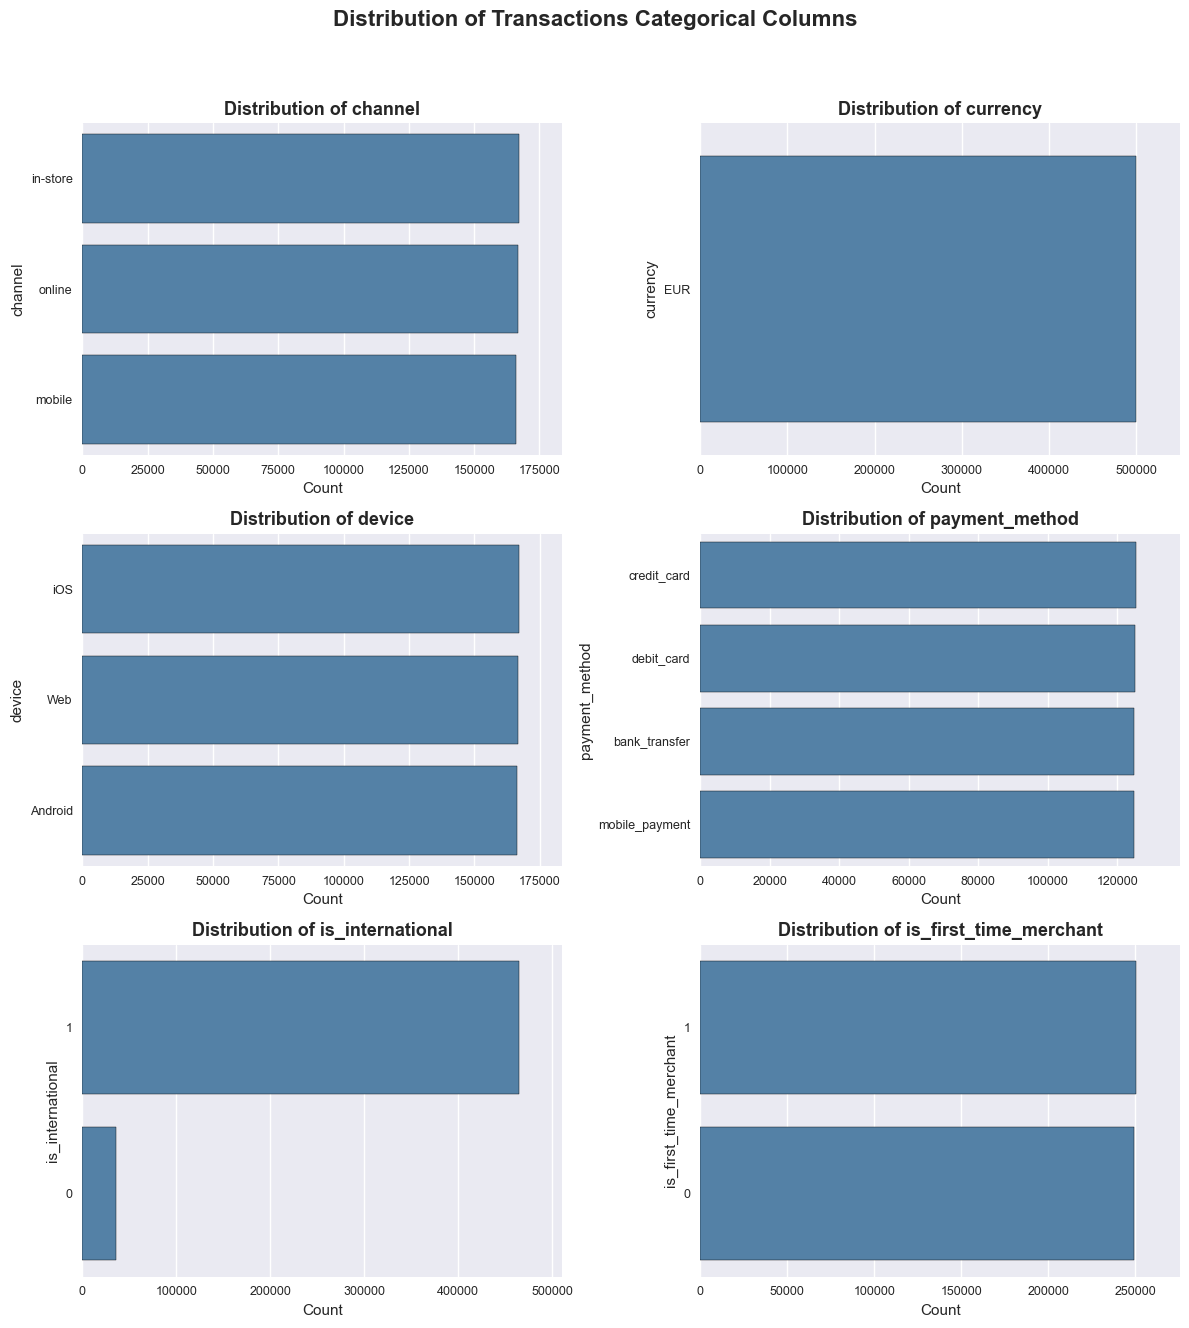

In [16]:
categorical_cols = ["channel", "currency", "device", "payment_method", "is_international", "is_first_time_merchant"]

fig, ax = dist_categorical_visualisation(df, categorical_cols, title='Distribution of Transactions Categorical Columns')

In [17]:
df["channel"].value_counts()

channel
in-store    167027
online      166847
mobile      166126
Name: count, dtype: int64

#### Summary:

- channel, device, payment_method show almost perfectly balanced category distribution
	- unusual in real-world data and indicates synthetic balancing or controlled generation
- currency has only one value, making it not-informative
	- recommendation: drop this feature

## Multivariate analysis

In [18]:
#### Amount vs is_fraud

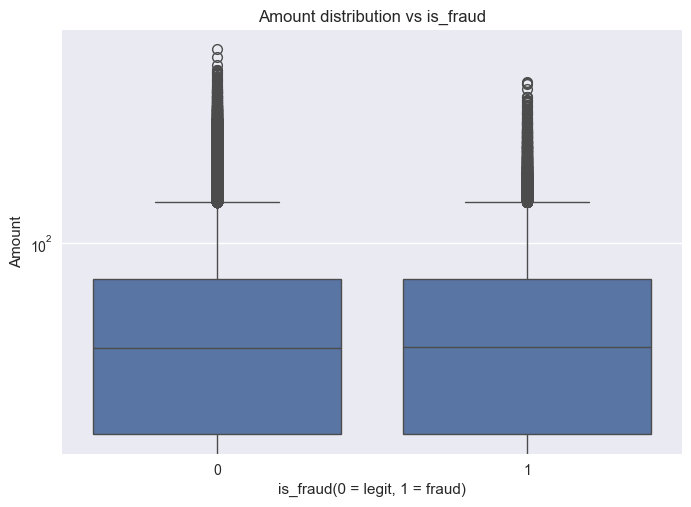

In [19]:
fig, ax = plt.subplots()

sns.boxplot(x='is_fraud', y='amount', data=df, ax=ax)
ax.set_title('Amount distribution vs is_fraud')
ax.set_xlabel('is_fraud(0 = legit, 1 = fraud)')
ax.set_ylabel('Amount')
ax.set_yscale('log')

Summary:
- amount is not a discriminative feature by itself for froud detection
- distribution are very similar
- may still be useful when combined with other features

#### Session Length Seconds vs is_fraud

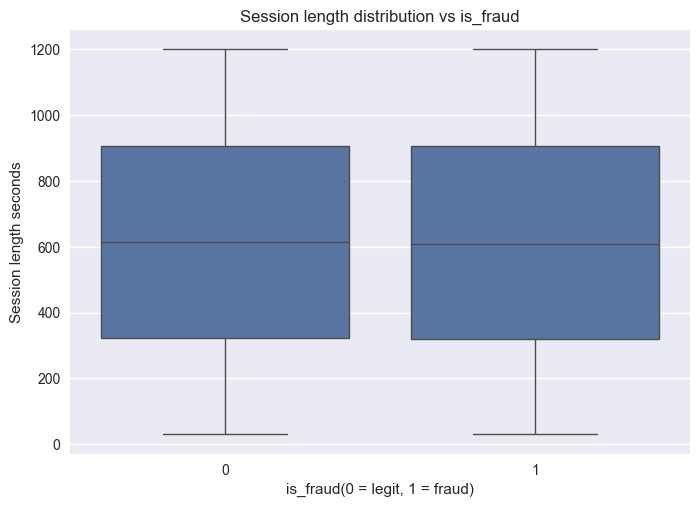

In [20]:
fig, ax = plt.subplots()

sns.boxplot(x='is_fraud', y='session_length_seconds', data=df, ax=ax)
ax.set_title('Session length distribution vs is_fraud')
ax.set_xlabel('is_fraud(0 = legit, 1 = fraud)')
ax.set_ylabel('Session length seconds')

plt.show()

## Time-based analysis

In [21]:
df["hour"] = df["timestamp"].dt.hour
df["dayofweek"] = df["timestamp"].dt.dayofweek

In [22]:
df.head()

,transaction_id,timestamp,user_id,merchant_id,amount,channel,currency,device,location,payment_method,is_international,session_length_seconds,is_first_time_merchant,is_fraud,hour,dayofweek
0,TX000000,2022-06-17 23:28:00,U14804,M0314,130.03,in-store,EUR,Android,"{'lat': 40.057938, 'long': 14.959737}",debit_card,1,145,0,0,23,4
1,TX000001,2022-01-04 15:39:00,U16634,M0675,132.00,online,EUR,Android,"{'lat': 42.05935, 'long': 1.596625}",debit_card,1,32,1,0,15,1
2,TX000002,2022-09-09 21:58:00,U18005,M0479,8.65,online,EUR,Android,"{'lat': 50.923432, 'long': 21.795262}",credit_card,1,604,1,0,21,4
3,TX000003,2023-11-20 06:40:00,U13690,M0538,19.82,mobile,EUR,iOS,"{'lat': 56.833396, 'long': -9.881566}",credit_card,0,1031,1,0,6,0
4,TX000004,2022-04-28 08:08:00,U04642,M0128,101.92,in-store,EUR,Android,"{'lat': 54.042996, 'long': 2.168516}",credit_card,1,330,0,0,8,3


In [28]:
df_ts = df.set_index('timestamp').sort_index()
frauds_counts = df_ts.resample("W")["is_fraud"].sum()
total_counts = df_ts.resample("W")["is_fraud"].count()
frauds_rate = (frauds_counts / total_counts).fillna(0)

In [29]:
frauds_rate

timestamp
2022-01-02    0.080942
2022-01-09    0.081751
2022-01-16    0.092311
2022-01-23    0.087424
2022-01-30    0.087745
                ...   
2023-12-03    0.085848
2023-12-10    0.085172
2023-12-17    0.086800
2023-12-24    0.081901
2023-12-31    0.091213
Freq: W-SUN, Name: is_fraud, Length: 105, dtype: float64

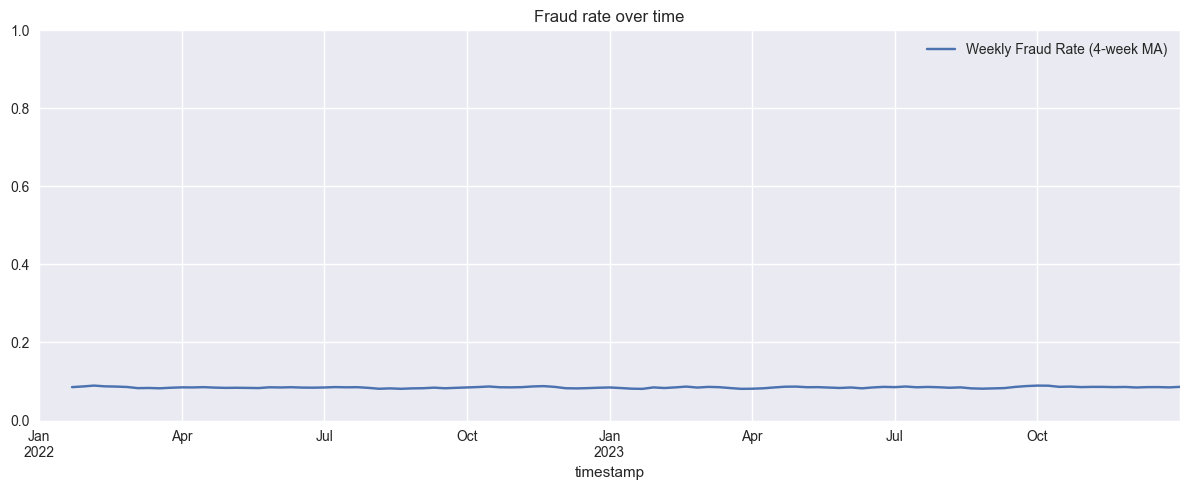

In [32]:
fig, ax = plt.subplots(figsize=(12, 5))

frauds_rate.rolling(4).mean().plot(ax=ax, label="Weekly Fraud Rate (4-week MA)")

ax.set_label("Fraud rate")
ax.set_title("Fraud rate over time")
ax.set_ylim(0, 1)
ax.legend()

fig.tight_layout()
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(12, 5))

frauds_rate.rolling(4).mean().plot(ax=ax, label="Weekly Fraud Rate (4-week MA)")

ax.set_label("Fraud rate")
ax.set_title("Fraud rate over time")
ax.set_ylim(0, 1)
ax.legend()

fig.tight_layout()
plt.show()

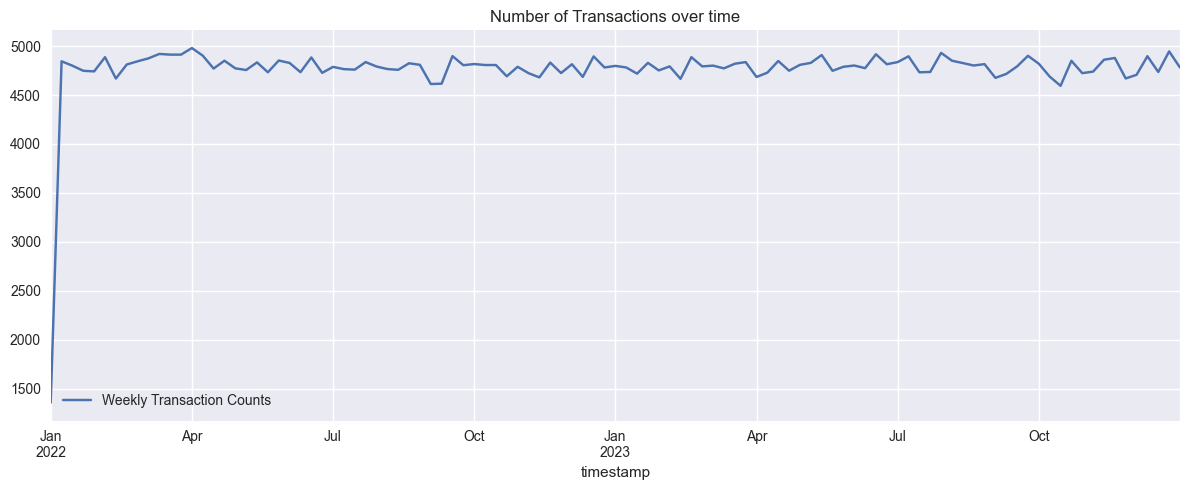

In [33]:
fig, ax = plt.subplots(figsize=(12, 5))

total_counts.plot(ax=ax, label="Weekly Transaction Counts")

ax.set_label("Transaction Counts")
ax.set_title("Number of Transactions over time")

ax.legend()

fig.tight_layout()
plt.show()

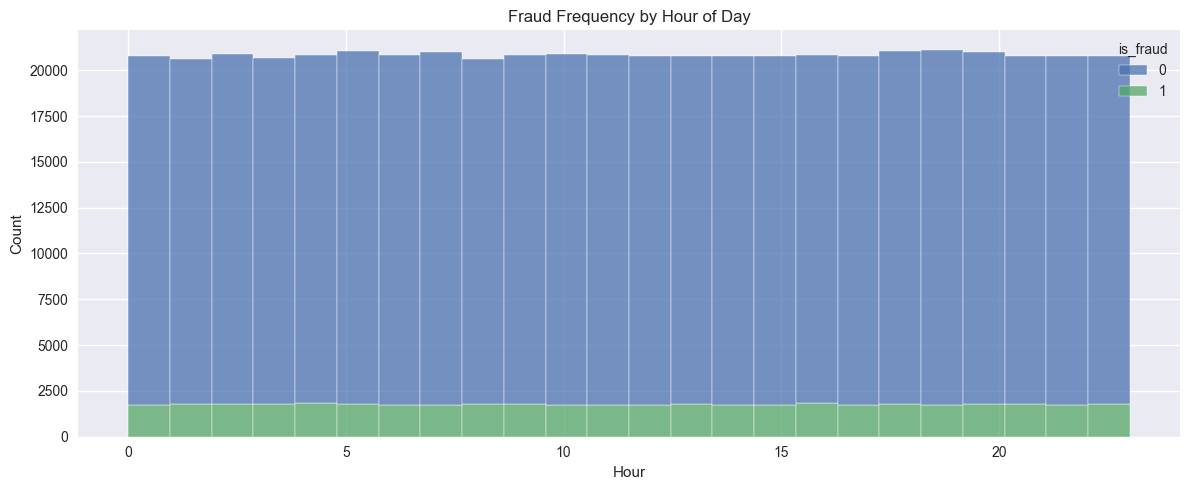

In [36]:
fig, ax = plt.subplots(figsize=(12, 5))

sns.histplot(data=df_ts, x="hour", hue="is_fraud", bins=24, ax=ax, multiple="stack")

ax.set_xlabel("Hour")
ax.set_ylabel("Count")
ax.set_title("Fraud Frequency by Hour of Day")

fig.tight_layout()
plt.show()

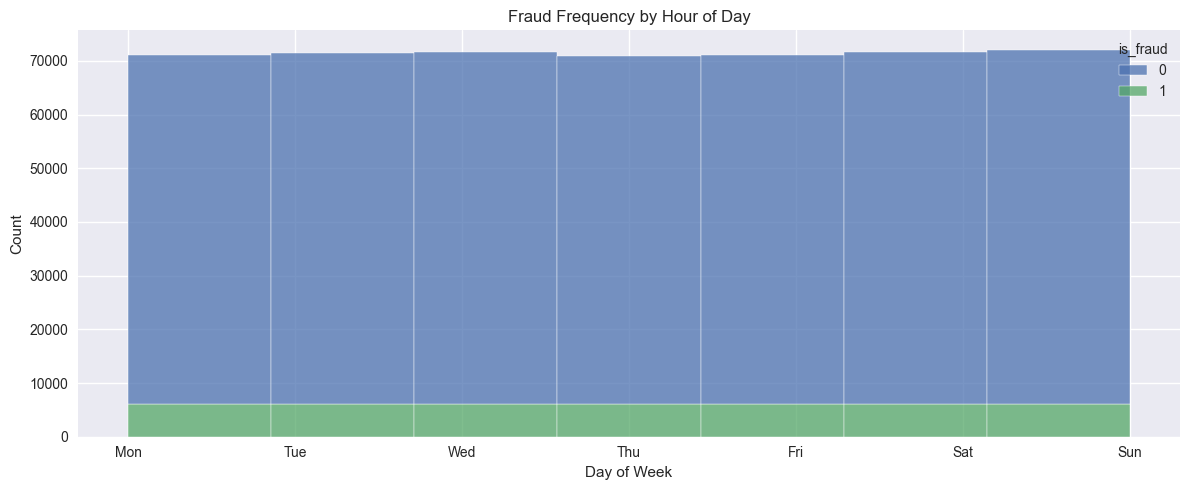

In [42]:
fig, ax = plt.subplots(figsize=(12, 5))

sns.histplot(data=df_ts, x="dayofweek", hue="is_fraud", bins=7, ax=ax, multiple="stack")

ax.set_xlabel("Day of Week")
ax.set_xticks(range(7))
ax.set_xticklabels(["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
ax.set_ylabel("Count")
ax.set_title("Fraud Frequency by Hour of Day")

fig.tight_layout()
plt.show()

#### 1. Fraud Rate Over Time (weekly trend)
- The fraud rate fluctuates mildly between ~8.1% and 8.9% over the two-year span.
- No clear upward or downward trend, but some short-term volatility is present.
- Suggests that fraud behavior is stationary over time (non-seasonal).

#### 2. Fraud Frequency by Hour of Day
- Fraud and legit transactions are evenly distributed across all hours.
- No visible peak during night or business hours.
- Indicates time of day likely has no predictive signal.

#### 3. Average Fraud Rate by Day of Week
- All days show nearly equal fraud rates (~8.5%).
- No significant weekday vs. weekend pattern.

### Summary
- Time-based features appear non-informative in isolation.
- Their value may emerge only through interactions or in tree-based models.
- Results align with the synthetic structure of the dataset.

# Correlation matrix

In [44]:
features = ["amount", "session_length_seconds", "is_fraud"]
corr = df_ts[features].corr()

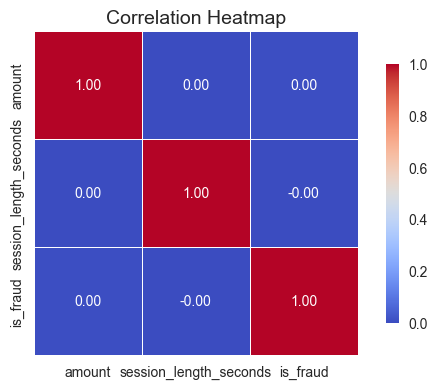

In [45]:
fig, ax = plt.subplots(figsize=(6, 4))

sns.heatmap(corr,
			ax=ax,
			annot=True,
			fmt='.2f',
			square=True,
			linewidths=.5,
			cbar_kws={"shrink": 0.8},
			cmap="coolwarm"
			)

ax.set_title("Correlation Heatmap", fontsize=14)
plt.tight_layout()
plt.show()

## Implication

- simple linear models (like Logistic Regression) on raw features will perform poorly
- more advanced models will be required (e.g. decision trees, boosting, neural nets)